In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_portabilidad = pd.read_csv(r'dataset_processed\Portabilidad_prces.csv')


In [17]:
df_portabilidad

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros
0,2012,3,-17,19,0,-2,0.0
1,2012,4,3508,-1134,-189,-2185,0.0
2,2012,5,1253,4792,-853,-5192,0.0
3,2012,6,3263,-1248,-848,-1167,0.0
4,2012,7,5554,-3847,-1105,-602,0.0
...,...,...,...,...,...,...,...
123,2022,6,-3012,20311,0,-17348,49.0
124,2022,7,2263,7363,0,-9653,27.0
125,2022,8,996,19548,0,-20585,41.0
126,2022,9,-2209,18050,0,-15982,141.0


In [18]:
df_portabilidad.describe()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros
count,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2017.000000,6.50000,1951.539062,4609.195312,-1114.257812,-5450.296875,3.820312
std,3.099403,3.40449,11088.648087,14646.975098,1272.612764,15141.533391,19.457781
min,2012.000000,1.00000,-18668.000000,-42345.000000,-4964.000000,-63567.000000,0.000000
25%,2014.000000,4.00000,-3427.250000,-1162.500000,-1895.250000,-13314.750000,0.000000
50%,2017.000000,6.50000,164.500000,4689.500000,-1058.000000,-5162.500000,0.000000
75%,2020.000000,9.00000,4877.500000,10935.000000,0.000000,-183.500000,0.000000
max,2022.000000,12.00000,41931.000000,38116.000000,0.000000,41453.000000,149.000000


In [19]:
df_portabilidad.columns

Index(['Año', 'Mes', 'Personal', 'Claro', 'Nextel', 'Movistar', 'Otros'], dtype='object')

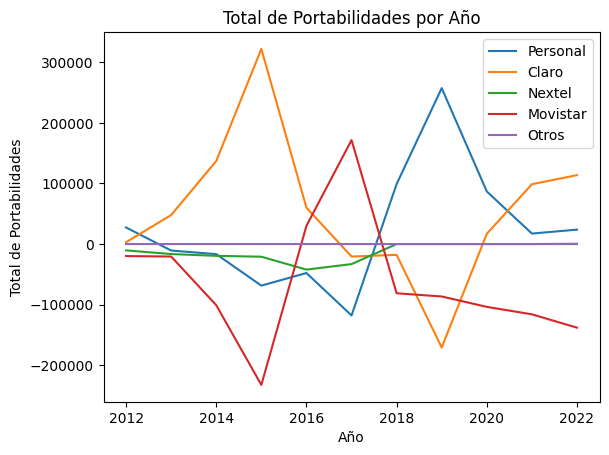

In [20]:
# Crear una columna 'Fecha' combinando las columnas 'Año' y 'Mes'
df_portabilidad['Fecha'] = df_portabilidad['Año'].astype(str) + '-' + df_portabilidad['Mes'].astype(str)

# Convertir la columna 'Fecha' a tipo datetime
df_portabilidad['Fecha'] = pd.to_datetime(df_portabilidad['Fecha'], format='%Y-%m')

# Agrupar por año y sumar las columnas de interés
df_agrupado = df_portabilidad.groupby(df_portabilidad['Fecha'].dt.year)[['Personal', 'Claro', 'Nextel', 'Movistar', 'Otros']].sum()

# Crear el gráfico de líneas
df_agrupado.plot(kind='line')

# Personalizar el gráfico
plt.title('Total de Portabilidades por Año')
plt.xlabel('Año')
plt.ylabel('Total de Portabilidades')

# Mostrar el gráfico
plt.show()


Teniendo en cuenta la portabilidad numerica (posibilidad de mantener tu numero luego de cambiarte de compania), podemos ver ciertas preferencias a lo largo del tiempo de cambios de una empresa a otra, entre 2014 por ejemplo donde muchos numero smigraron de Movistar y por consecuencia Claro recivio en ese periodo muchos numeros.

Entre 2018 y 2020 paso algo similar entre Claro y Movistar perdiendo numeros y Personal ganando una gran parte del mercado.

Otro dato interesante es como Claro repunta llegando a 2022 y como Personal, sin tener tantas perdidas a lo largo de los anios y teniendo un gran auge entre 2018 y 2020, se estabiliza y se muestra en crecimiento.

Al menos en el sector movil, Claro y Personal parecen ser las tendecias a la hora de cambio de compania lo cual las convierten en buenas empresas como para tener en cuenta una alianza en el sector movil, para proporcionar paquetes de Internet personalizados.

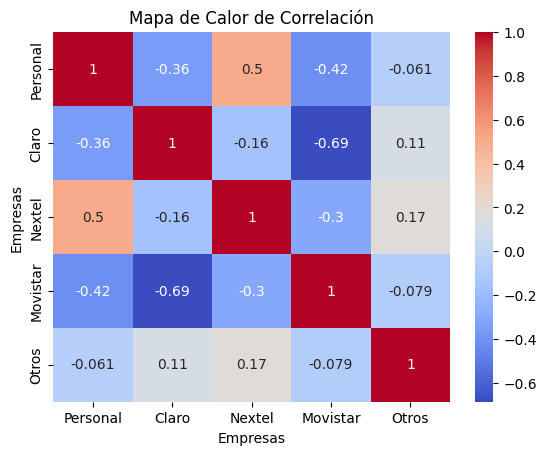

In [21]:
# Seleccionar las columnas de interés
columnas = ['Personal', 'Claro', 'Nextel', 'Movistar', 'Otros']
df_correlacion = df_portabilidad[columnas]

# Calcular la matriz de correlación
correlation_matrix = df_correlacion.corr()

# Crear el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Empresas')
plt.ylabel('Empresas')

# Mostrar el mapa de calor
plt.show()